# Scatterplot

If we want to see the relationship between paired measurements, a scatterplot is a good choice

Examples would be:
    
<ul>
<li> Heights of brothers and sisters
<li> A patient's blood pressure before and after taking a drug
<li> Reaction time on the same task with and without distraction
</ul>

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [16]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

## Example

A researcher hypothesises that men are taller than women.

He also notices that there is a considerable genetic influence on height, with some families being taller than others

He decides to control for this by comparing the heights of brothers and sisters (shared genetic influence, shared upbringing). This is a <b>paired</b> design.

### Load and inspect the data

<img src= "images/tallVshort.jpg" width=50% alt="A picture of people of different heights"  />

Load the file brotherSisterData.csv which contains heights in cm for 25 brother-sister pairs

In [2]:
heightData = pandas.read_csv('data/brotherSisterData.csv')
display(heightData)

,brother,sister
0,174,172
1,183,180
2,154,148
3,172,180
4,172,165
5,161,159
6,167,159
7,172,164
8,195,188
9,189,175


### Plot the distributions independently

Let's use a KDE plot to compare the heights of the men (brothers) and women (sisters) in the sample.

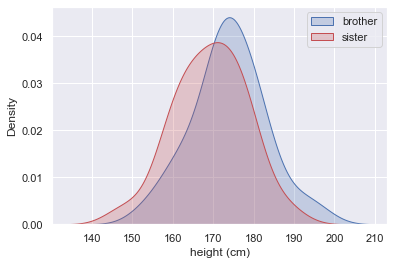

In [18]:
sns.kdeplot(heightData["brother"],  color='b',  fill='true', label='brother')
sns.kdeplot(heightData["sister"],  color='r',  fill='true', label='sister' )
plt.xlabel('height (cm)')
plt.legend()

There's a lot of overlap for sure. 

But comparing all the men to all the women is wasting the power of our paired design!

### Scatterplot

On a scatterplot, each dot represents <b>two</b> paired datapoints - a brother and sister:

<AxesSubplot:xlabel='brother', ylabel='sister'>

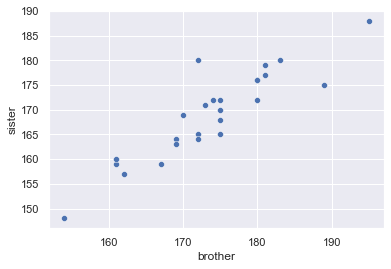

In [19]:
sns.scatterplot(x=heightData["brother"], y=heightData["sister"])

Let's add the line x=y to help us interpret the data. 

If all the brothers were exactly the same height as their sisters, we would expect all data points to fall exactly on the line x=y

If brothers were roughly the same height as their sisters (with some random variation) we would expect the data points to fall equally often above and below the line x=y


<i><b>Aside</b></i>
To add the line x=y we use the <tt>matplotlib</tt> function <tt>plot</tt>. The arguments of this function are the x and y values for the ends of the line (x and y both range from 150-190), and the argument 'k--' which sets the color and line type.
<ul>
    <li> See if you can change the code to draw a red horizontal line at y=170
</ul>

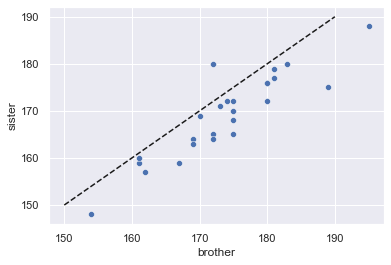

In [23]:
sns.scatterplot(x=heightData["brother"], y=heightData["sister"])
plt.plot([150, 190],[150, 190], 'k--')

In fact, most of the datapoints fall on one side of the line (below it)
<ul>
<li> This means either than most of the brothers are taller than their sisters, or vice versa - which is it (look at the graph)?
<ul>

### Correlation

Notice that in the scatterplot, the data points are spread out along the line x=y.

This means that in general tall brothers have tall sisters and this variation between families rather dwarfs the effect of interest (that within each family the brother is taller than his own sister)

This feature of the plot is evidence gthat a paired design was a particularly good choice for this question - in te paired design, the (large) variation between families is cancelled out allowing us to detect the (smaall) differnece between male and females.

### Jointplot

It was nice to be able to see the distribution for each group (brothers and sisters) in the KDE plots, but the KDE plot didn't show the relationship between brothers and sisters

It was nice to see the relationship between brothers an dtheir sisters in the scatterplot, but it is hard to get a sense of the distribution 

We can get the best of both worlds by useing <tt>seaborn</tt> function <tt>jointplot</tt>, which shows the <b>marginal</b> distributions (the height distributions for brothers and sisters separately) at the side of the main scatter plot

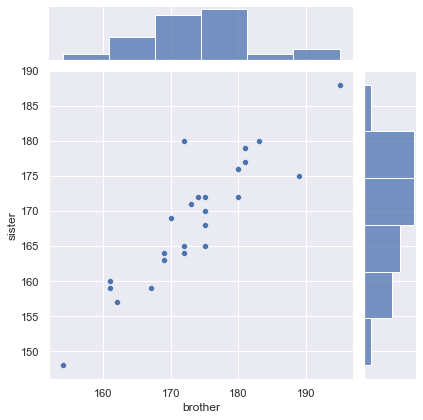

In [32]:
sns.jointplot(x=heightData["brother"], y=heightData["sister"])

We can adjust the bins and add a KDE plot if we like:

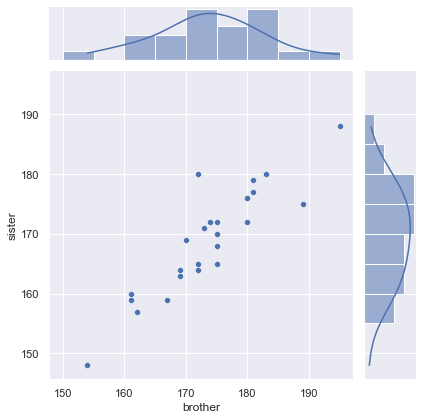

In [41]:
sns.jointplot(x=heightData["brother"], y=heightData["sister"], marginal_kws=dict(bins=range(150,200,5), kde="true"))

Finally, we can add the line x=y. 

This is a little fiddly as we have to tell the computer which part of the the joint plot to add the line to, by getting a <i>handle</i> to the plot.

Don't worry if this makes no sense, you can skip it!

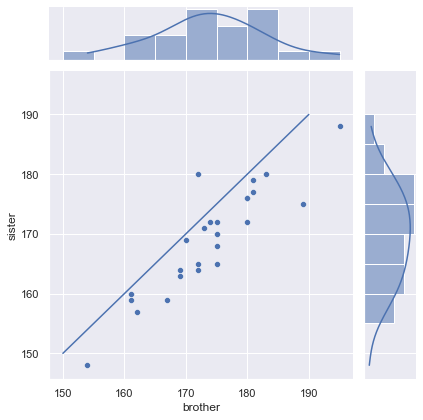

In [44]:
# create the joint plot as before but give it a label - "myfig"
myfig = sns.jointplot(x=heightData["brother"], y=heightData["sister"], marginal_kws=dict(bins=range(150,200,5), kde="true"))
# plot the line x=y onto the joint axis (ax_joint) of myfig
myfig.ax_joint.plot([150,190],[150,190])